## INFOSYS722_BDAS_ASSIGNMENT_LORRAINE ZHOU

In [45]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()
import pandas as pd
sc = spark.sparkContext

In [46]:
df = spark.read.csv('BostonCrime2.0.csv',header=True,inferSchema=True)

# Data Exploration

In [47]:
df.show()

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

In [48]:
df.printSchema()

root
 |-- INCIDENTNUMBER: integer (nullable = true)
 |-- OFFENSECODE: integer (nullable = true)
 |-- OFFENSECODEGROUP: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- REPORTINGAREA: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- UCRPART: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)



In [49]:
print(df.head(1))

[Row(INCIDENTNUMBER=1, OFFENSECODE=1102, OFFENSECODEGROUP='Fraud', DISTRICT='D4', REPORTINGAREA='619', YEAR=2015, MONTH=12, DAYOFWEEK='Sunday', HOUR=14, UCRPART='Part Two', STREET='WESTLAND AVE', SHOOTING='N')]


In [50]:
df.describe().show()

+-------+------------------+------------------+------------------+--------+-----------------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|summary|    INCIDENTNUMBER|       OFFENSECODE|  OFFENSECODEGROUP|DISTRICT|    REPORTINGAREA|              YEAR|            MONTH|DAYOFWEEK|             HOUR| UCRPART|   STREET|SHOOTING|
+-------+------------------+------------------+------------------+--------+-----------------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|  count|               800|               800|               800|     772|              800|               800|              800|      800|              800|     800|      783|     800|
|   mean|             400.5|        1949.24875|              null|    null| 404.742782152231|        2016.50375|           8.2025|     null|            15.49|    null|     null|    null|
| stddev|231.08440016582685|1095.3304308812276|              null

In [51]:
df.select('YEAR','MONTH','HOUR').describe().show()

+-------+------------------+-----------------+-----------------+
|summary|              YEAR|            MONTH|             HOUR|
+-------+------------------+-----------------+-----------------+
|  count|               800|              800|              800|
|   mean|        2016.50375|           8.2025|            15.49|
| stddev|1.1209623692572204|2.677770867909777|6.011661591762074|
|    min|              2015|                1|                1|
|    max|              2018|               12|               24|
+-------+------------------+-----------------+-----------------+



In [52]:
df.select('INCIDENTNUMBER','OFFENSECODE','OFFENSECODEGROUP','DISTRICT','REPORTINGAREA','YEAR','MONTH','DAYOFWEEK','HOUR','UCRPART','STREET','SHOOTING').describe().show()

+-------+------------------+------------------+------------------+--------+-----------------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|summary|    INCIDENTNUMBER|       OFFENSECODE|  OFFENSECODEGROUP|DISTRICT|    REPORTINGAREA|              YEAR|            MONTH|DAYOFWEEK|             HOUR| UCRPART|   STREET|SHOOTING|
+-------+------------------+------------------+------------------+--------+-----------------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|  count|               800|               800|               800|     772|              800|               800|              800|      800|              800|     800|      783|     800|
|   mean|             400.5|        1949.24875|              null|    null| 404.742782152231|        2016.50375|           8.2025|     null|            15.49|    null|     null|    null|
| stddev|231.08440016582685|1095.3304308812276|              null

# Data Manipulation

Select

In [53]:
mon_col = df.select('MONTH')
mon_col.show()

+-----+
|MONTH|
+-----+
|   12|
|   12|
|    7|
|   11|
|   10|
|    9|
|    8|
|   10|
|    8|
|    8|
|    7|
|   11|
|   12|
|    7|
|    9|
|    9|
|   10|
|    7|
|    8|
|   10|
+-----+
only showing top 20 rows



Filter

In [54]:
df.filter("MONTH > 6").show()
df.filter("MONTH > 6").select('YEAR','MONTH').show()

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

In [55]:
df.filter(df.MONTH == '6').show()

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|              STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------------+--------+
|            38|       2629|          Harassment|     C11|          397|2015|    6|   Monday|  24|  Part Two|        MELBOURNE ST|       N|
|            93|       3018|  Medical Assistance|      C6|          177|2015|    6|   Sunday|  12|Part Three|      NEW SUDBURY ST|       N|
|            97|       1102|               Fraud|      D4|          618|2015|    6|   Friday|  17|  Part Two|            OPERA PL|       N|
|           123|       3501|Missing Person Re...|      B3|          457|2015|    6| Saturday|  16|Part Three|         DRUMMOND ST|       N|
|           124|    

In [56]:
df.filter("HOUR='12'").show()

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|              STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------------+--------+
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|         OAKCREST RD|       N|
|             8|       1102|               Fraud|     C11|          450|2015|   10|Wednesday|  12|  Part Two|       WASHINGTON ST|       N|
|            23|       3110|Police Service In...|      E5|          552|2015|    9|  Tuesday|  12|Part Three|          DENTON TER|       N|
|            32|       1102|               Fraud|      A1|           92|2015|   10|  Tuesday|  12|  Part Two|            COURT ST|       N|
|            33|    

In [57]:
df.filter("MONTH > 6 AND HOUR < 12").select('INCIDENTNUMBER','MONTH','HOUR').show()

+--------------+-----+----+
|INCIDENTNUMBER|MONTH|HOUR|
+--------------+-----+----+
|             4|   11|   8|
|             6|    9|  11|
|             7|    8|   8|
|             9|    8|   6|
|            12|   11|  11|
|            13|   12|   4|
|            14|    7|   8|
|            16|    9|   9|
|            17|   10|   8|
|            19|    8|   9|
|            21|   12|   9|
|            25|    9|   9|
|            26|   10|   9|
|            27|    8|   9|
|            28|    7|   2|
|            29|   10|   9|
|            31|   11|   9|
|            43|    9|   7|
|            45|    8|   9|
|            55|    8|   9|
+--------------+-----+----+
only showing top 20 rows



Mutate, or creating new columns (only boolean type, string is not applicable, so the result comes null, Year*Month just tried to use this function, the result is unnecessary here.

In [58]:
df.withColumn('YEARMONTH', df.YEAR*df.MONTH).show()

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+---------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|YEARMONTH|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+---------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|    24180|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|    24180|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|    14105|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|   

# Data Aggregation

Summarize and group by

In [59]:
df.groupBy('MONTH').mean().show()

+-----+-------------------+------------------+------------------+----------+------------------+
|MONTH|avg(INCIDENTNUMBER)|  avg(OFFENSECODE)|         avg(YEAR)|avg(MONTH)|         avg(HOUR)|
+-----+-------------------+------------------+------------------+----------+------------------+
|   12|  298.0091743119266| 1735.697247706422|2015.9816513761468|      12.0|15.458715596330276|
|    1| 339.05882352941177|1959.2941176470588|2016.4117647058824|       1.0|17.529411764705884|
|    6| 387.76785714285717| 2149.214285714286|            2016.5|       6.0|              14.5|
|    3|              403.6|           1981.25|            2016.5|       3.0|             15.35|
|    5|  404.9130434782609|2087.1739130434785|2016.5652173913043|       5.0|13.695652173913043|
|    9|            275.175|         1879.8125|         2015.8375|       9.0|             16.45|
|    4|  361.1764705882353|1483.6470588235295|2016.3529411764705|       4.0|15.647058823529411|
|    8| 267.67857142857144| 2092.2142857

In [60]:
df.groupBy('DISTRICT').mean().show()

+--------+-------------------+------------------+------------------+-----------------+------------------+
|DISTRICT|avg(INCIDENTNUMBER)|  avg(OFFENSECODE)|         avg(YEAR)|       avg(MONTH)|         avg(HOUR)|
+--------+-------------------+------------------+------------------+-----------------+------------------+
|      C6| 454.06060606060606|1832.7272727272727|2016.7272727272727|8.742424242424242|14.984848484848484|
|    null|              586.0|2155.8571428571427|2017.5357142857142|6.642857142857143|15.821428571428571|
|      B2|  412.8411214953271|  1844.96261682243|2016.5140186915887|8.327102803738319| 15.14018691588785|
|     C11| 349.24074074074076|1947.4722222222222|2016.3333333333333| 8.50925925925926|15.814814814814815|
|     E13| 488.88235294117646|2167.3529411764707|2016.9117647058824|7.764705882352941|14.941176470588236|
|      B3| 365.25396825396825|2144.2698412698414|2016.3174603174602|7.761904761904762|15.031746031746032|
|      E5| 360.94545454545454|1907.30909090909

In [61]:
group_month_df = df.groupBy('MONTH').mean()
print("Sorted by HOUR")
group_month_df.orderBy('avg(HOUR)').show()
print("Sorted by YEAR")
df.groupBy('MONTH').mean().orderBy('avg(YEAR)').show()

Sorted by HOUR
+-----+-------------------+------------------+------------------+----------+------------------+
|MONTH|avg(INCIDENTNUMBER)|  avg(OFFENSECODE)|         avg(YEAR)|avg(MONTH)|         avg(HOUR)|
+-----+-------------------+------------------+------------------+----------+------------------+
|    2| 358.93333333333334|            1880.6|2016.2666666666667|       2.0|13.466666666666667|
|    5|  404.9130434782609|2087.1739130434785|2016.5652173913043|       5.0|13.695652173913043|
|    6| 387.76785714285717| 2149.214285714286|            2016.5|       6.0|              14.5|
|   10|  307.7752808988764|1578.9550561797753|2016.0224719101125|      10.0|14.561797752808989|
|    3|              403.6|           1981.25|            2016.5|       3.0|             15.35|
|    7|  616.5818965517242| 2165.668103448276|2017.5905172413793|       7.0|15.387931034482758|
|   12|  298.0091743119266| 1735.697247706422|2015.9816513761468|      12.0|15.458715596330276|
|    4|  361.176470588235

# Cleaning Up

In [62]:
from pyspark.sql.functions import format_number, col

In [63]:
group_month_df = df.groupBy('MONTH').mean()
group_month_df.show()
group_month_df = group_month_df.select('MONTH',
                                   format_number('avg(HOUR)',2),
                                   format_number('avg(YEAR)',2))
group_month_df.show()

group_month_df = group_month_df.select(col('MONTH').alias('INCIDENT_NUMBER'),
                                   col('format_number(avg(HOUR), 2)').alias('Average HOUR'),
                                   col('format_number(avg(YEAR), 2)').alias('Average YEAR'))
group_month_df.show()
                            
group_month_df = group_month_df.orderBy('Average HOUR')
                                       
print('Average HOUR and YEAR by INCIDENT_NUMBER')
group_month_df.show()

+-----+-------------------+------------------+------------------+----------+------------------+
|MONTH|avg(INCIDENTNUMBER)|  avg(OFFENSECODE)|         avg(YEAR)|avg(MONTH)|         avg(HOUR)|
+-----+-------------------+------------------+------------------+----------+------------------+
|   12|  298.0091743119266| 1735.697247706422|2015.9816513761468|      12.0|15.458715596330276|
|    1| 339.05882352941177|1959.2941176470588|2016.4117647058824|       1.0|17.529411764705884|
|    6| 387.76785714285717| 2149.214285714286|            2016.5|       6.0|              14.5|
|    3|              403.6|           1981.25|            2016.5|       3.0|             15.35|
|    5|  404.9130434782609|2087.1739130434785|2016.5652173913043|       5.0|13.695652173913043|
|    9|            275.175|         1879.8125|         2015.8375|       9.0|             16.45|
|    4|  361.1764705882353|1483.6470588235295|2016.3529411764705|       4.0|15.647058823529411|
|    8| 267.67857142857144| 2092.2142857

# Data Cleaning

In [64]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()

In [65]:
df.show()
print("Total data points:", df.count())

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

Dropping Rows - Missing Data Point

In [66]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()

In [67]:
df.na.drop().show()
print("Total data points:", df.count())

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

In [68]:
dropped_df = df.na.drop()
dropped_df.show()
print("Total data points:", dropped_df.count())

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

Dropping Rows - Missing Field

In [69]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()

In [70]:
missing_field_df = df.na.drop(subset="STREET")
missing_field_df.show()
print("Total data points:", missing_field_df.count())

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

In [71]:
missing_field_df = df.na.drop(subset="DISTRICT")
missing_field_df.show()
print("Total data points:", missing_field_df.count())

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

Filling Null Values

In [72]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()

In [73]:
filled_df = df.na.fill('UNDISCLOSED', subset=['STREET'])
filled_df.show()
print("Total data points:", filled_df.count())

+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|    

In [74]:
filled_df = df.na.fill('UNDISCLOSED', subset=['DISTRICT'])
filled_df.show()
print("Total data points:", filled_df.count())

+--------------+-----------+--------------------+-----------+-------------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|   DISTRICT|REPORTINGAREA|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+-----------+-------------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|         D4|          619|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|         D4|          619|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|        E18|          486|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|         C6|          226|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|             

# Logistic Regression 

In [75]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()

from pyspark.ml.classification import LogisticRegression

In [76]:
df.printSchema()
print(df.columns)

root
 |-- INCIDENTNUMBER: integer (nullable = true)
 |-- OFFENSECODE: integer (nullable = true)
 |-- OFFENSECODEGROUP: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- REPORTINGAREA: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- UCRPART: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)

['INCIDENTNUMBER', 'OFFENSECODE', 'OFFENSECODEGROUP', 'DISTRICT', 'REPORTINGAREA', 'YEAR', 'MONTH', 'DAYOFWEEK', 'HOUR', 'UCRPART', 'STREET', 'SHOOTING']


Utilising Pandas

In [77]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,INCIDENTNUMBER,OFFENSECODE,OFFENSECODEGROUP,DISTRICT,REPORTINGAREA,YEAR,MONTH,DAYOFWEEK,HOUR,UCRPART,STREET,SHOOTING
0,1,1102,Fraud,D4,619,2015,12,Sunday,14,Part Two,WESTLAND AVE,N
1,2,619,Larceny,D4,619,2015,12,Sunday,14,Part One,WESTLAND AVE,N
2,3,1107,Fraud,E18,486,2015,7,Wednesday,12,Part Two,OAKCREST RD,N
3,4,1107,Fraud,C6,226,2015,11,Thursday,8,Part Two,E FOURTH ST,N
4,5,2647,Other,D4,129,2015,10,Saturday,13,Part Two,BERKELEY ST,N


In [78]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
INCIDENTNUMBER,1,2,3,4,5
OFFENSECODE,1102,619,1107,1107,2647
OFFENSECODEGROUP,Fraud,Larceny,Fraud,Fraud,Other
DISTRICT,D4,D4,E18,C6,D4
REPORTINGAREA,619,619,486,226,129
YEAR,2015,2015,2015,2015,2015
MONTH,12,12,7,11,10
DAYOFWEEK,Sunday,Sunday,Wednesday,Thursday,Saturday
HOUR,14,14,12,8,13
UCRPART,Part Two,Part One,Part Two,Part Two,Part Two


In [79]:
# We can use group by and count to find out how many data points we have for each class in our predictor. 
df.groupby('SHOOTING').count().toPandas()

,SHOOTING,count
0,Y,3
1,N,797


In [80]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
INCIDENTNUMBER,800,400.5,231.08440016582685,1,800
OFFENSECODE,800,1949.24875,1095.3304308812276,301,3831
YEAR,800,2016.50375,1.1209623692572204,2015,2018
MONTH,800,8.2025,2.677770867909777,1,12
HOUR,800,15.49,6.011661591762074,1,24


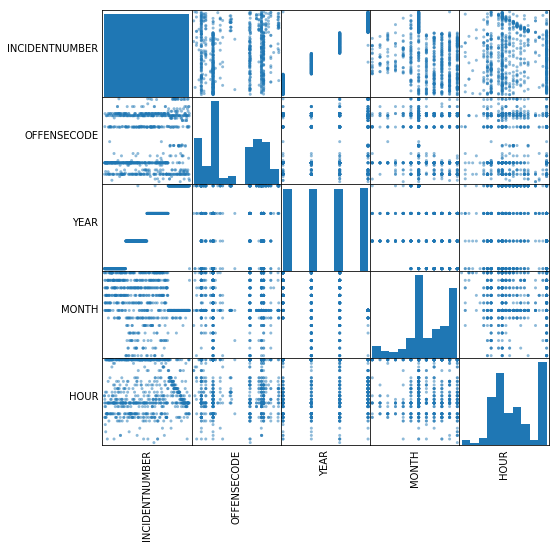

In [81]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Select useful columns

In [82]:
# Now that we've carried out some basic data exploration, let's select the relevant features. Day/month have been excluded as they're irrelevant.
# It’s obvious that there aren’t highly correlated numeric variables. Therefore, we will keep all of them for the model. However, OFFENSE_CODE_GROUP and UCR_PART columns are not really useful, we will remove these two columns.
df = df.select('INCIDENTNUMBER','OFFENSECODE','DISTRICT','YEAR','MONTH','DAYOFWEEK','HOUR','STREET','SHOOTING')
df.printSchema()

root
 |-- INCIDENTNUMBER: integer (nullable = true)
 |-- OFFENSECODE: integer (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)



Working with Categorical Columns


In [83]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

DISTRICT_indexer = StringIndexer(inputCol='DISTRICT',outputCol='DISTRICTIndex')
DAYOFWEEK_indexer = StringIndexer(inputCol='DAYOFWEEK',outputCol='DAYOFWEEKIndex')
STREET_indexer = StringIndexer(inputCol='STREET',outputCol='STREETIndex')
SHOOTING_indexer = StringIndexer(inputCol='SHOOTING',outputCol='label')

DISTRICT_encoder = OneHotEncoder(inputCol='DISTRICTIndex',outputCol='DISTRICTVec')
DAYOFWEEK_encoder = OneHotEncoder(inputCol='DAYOFWEEKIndex',outputCol='DAYOFWEEKVec')
STREET_encoder = OneHotEncoder(inputCol='STREETIndex',outputCol='STREETVec')

assembler = VectorAssembler(inputCols=['DISTRICTVec','DAYOFWEEKVec','STREETVec','INCIDENTNUMBER',
                                       'OFFENSECODE','YEAR','MONTH','HOUR'], outputCol="features")

In [84]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[DISTRICT_indexer, DAYOFWEEK_indexer, STREET_indexer, SHOOTING_indexer,
                            DISTRICT_encoder, DAYOFWEEK_encoder, STREET_encoder, assembler])



In [44]:
pipeline_model = pipeline.fit(df)
pipe_df = pipeline_model.transform(df)
pipe_df = pipe_df.select('label', 'features')

Py4JJavaError: An error occurred while calling o253.transform.
: java.lang.NullPointerException
	at org.apache.spark.sql.types.Metadata$.org$apache$spark$sql$types$Metadata$$hash(Metadata.scala:219)
	at org.apache.spark.sql.types.Metadata$$anonfun$org$apache$spark$sql$types$Metadata$$hash$2.apply(Metadata.scala:207)
	at org.apache.spark.sql.types.Metadata$$anonfun$org$apache$spark$sql$types$Metadata$$hash$2.apply(Metadata.scala:207)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at scala.collection.TraversableLike$class.map(TraversableLike.scala:234)
	at scala.collection.AbstractTraversable.map(Traversable.scala:104)
	at org.apache.spark.sql.types.Metadata$.org$apache$spark$sql$types$Metadata$$hash(Metadata.scala:207)
	at org.apache.spark.sql.types.Metadata$$anonfun$org$apache$spark$sql$types$Metadata$$hash$1.apply(Metadata.scala:204)
	at org.apache.spark.sql.types.Metadata$$anonfun$org$apache$spark$sql$types$Metadata$$hash$1.apply(Metadata.scala:204)
	at scala.collection.MapLike$MappedValues$$anonfun$foreach$3.apply(MapLike.scala:245)
	at scala.collection.MapLike$MappedValues$$anonfun$foreach$3.apply(MapLike.scala:245)
	at scala.collection.TraversableLike$WithFilter$$anonfun$foreach$1.apply(TraversableLike.scala:733)
	at scala.collection.immutable.Map$Map3.foreach(Map.scala:161)
	at scala.collection.TraversableLike$WithFilter.foreach(TraversableLike.scala:732)
	at scala.collection.MapLike$MappedValues.foreach(MapLike.scala:245)
	at scala.util.hashing.MurmurHash3.unorderedHash(MurmurHash3.scala:91)
	at scala.util.hashing.MurmurHash3$.mapHash(MurmurHash3.scala:222)
	at scala.collection.GenMapLike$class.hashCode(GenMapLike.scala:35)
	at scala.collection.AbstractMap.hashCode(Map.scala:59)
	at scala.runtime.ScalaRunTime$.hash(ScalaRunTime.scala:206)
	at org.apache.spark.sql.types.Metadata$.org$apache$spark$sql$types$Metadata$$hash(Metadata.scala:204)
	at org.apache.spark.sql.types.Metadata$$anonfun$org$apache$spark$sql$types$Metadata$$hash$1.apply(Metadata.scala:204)
	at org.apache.spark.sql.types.Metadata$$anonfun$org$apache$spark$sql$types$Metadata$$hash$1.apply(Metadata.scala:204)
	at scala.collection.MapLike$MappedValues$$anonfun$foreach$3.apply(MapLike.scala:245)
	at scala.collection.MapLike$MappedValues$$anonfun$foreach$3.apply(MapLike.scala:245)
	at scala.collection.TraversableLike$WithFilter$$anonfun$foreach$1.apply(TraversableLike.scala:733)
	at scala.collection.immutable.Map$Map1.foreach(Map.scala:116)
	at scala.collection.TraversableLike$WithFilter.foreach(TraversableLike.scala:732)
	at scala.collection.MapLike$MappedValues.foreach(MapLike.scala:245)
	at scala.util.hashing.MurmurHash3.unorderedHash(MurmurHash3.scala:91)
	at scala.util.hashing.MurmurHash3$.mapHash(MurmurHash3.scala:222)
	at scala.collection.GenMapLike$class.hashCode(GenMapLike.scala:35)
	at scala.collection.AbstractMap.hashCode(Map.scala:59)
	at scala.runtime.ScalaRunTime$.hash(ScalaRunTime.scala:206)
	at org.apache.spark.sql.types.Metadata$.org$apache$spark$sql$types$Metadata$$hash(Metadata.scala:204)
	at org.apache.spark.sql.types.Metadata._hashCode$lzycompute(Metadata.scala:107)
	at org.apache.spark.sql.types.Metadata._hashCode(Metadata.scala:107)
	at org.apache.spark.sql.types.Metadata.hashCode(Metadata.scala:108)
	at org.apache.spark.sql.catalyst.expressions.AttributeReference.hashCode(namedExpressions.scala:249)
	at scala.runtime.ScalaRunTime$.hash(ScalaRunTime.scala:206)
	at scala.collection.immutable.HashSet.elemHashCode(HashSet.scala:177)
	at scala.collection.immutable.HashSet.computeHash(HashSet.scala:186)
	at scala.collection.immutable.HashSet.$plus(HashSet.scala:84)
	at scala.collection.immutable.HashSet.$plus(HashSet.scala:35)
	at scala.collection.mutable.SetBuilder.$plus$eq(SetBuilder.scala:22)
	at scala.collection.mutable.SetBuilder.$plus$eq(SetBuilder.scala:20)
	at scala.collection.generic.Growable$class.loop$1(Growable.scala:53)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:57)
	at scala.collection.mutable.SetBuilder.$plus$plus$eq(SetBuilder.scala:20)
	at scala.collection.TraversableLike$class.to(TraversableLike.scala:590)
	at scala.collection.AbstractTraversable.to(Traversable.scala:104)
	at scala.collection.TraversableOnce$class.toSet(TraversableOnce.scala:304)
	at scala.collection.AbstractTraversable.toSet(Traversable.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.containsChild$lzycompute(TreeNode.scala:89)
	at org.apache.spark.sql.catalyst.trees.TreeNode.containsChild(TreeNode.scala:89)
	at org.apache.spark.sql.catalyst.trees.TreeNode$$anonfun$4$$anonfun$apply$11.apply(TreeNode.scala:335)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.immutable.List.foreach(List.scala:381)
	at scala.collection.TraversableLike$class.map(TraversableLike.scala:234)
	at scala.collection.immutable.List.map(List.scala:285)
	at org.apache.spark.sql.catalyst.trees.TreeNode$$anonfun$4.apply(TreeNode.scala:334)
	at org.apache.spark.sql.catalyst.trees.TreeNode.mapProductIterator(TreeNode.scala:188)
	at org.apache.spark.sql.catalyst.trees.TreeNode.mapChildren(TreeNode.scala:305)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:275)
	at org.apache.spark.sql.catalyst.plans.QueryPlan$$anonfun$transformExpressionsDown$1.apply(QueryPlan.scala:245)
	at org.apache.spark.sql.catalyst.plans.QueryPlan$$anonfun$transformExpressionsDown$1.apply(QueryPlan.scala:245)
	at org.apache.spark.sql.catalyst.plans.QueryPlan.transformExpression$1(QueryPlan.scala:266)
	at org.apache.spark.sql.catalyst.plans.QueryPlan.org$apache$spark$sql$catalyst$plans$QueryPlan$$recursiveTransform$1(QueryPlan.scala:276)
	at org.apache.spark.sql.catalyst.plans.QueryPlan$$anonfun$6.apply(QueryPlan.scala:285)
	at org.apache.spark.sql.catalyst.trees.TreeNode.mapProductIterator(TreeNode.scala:188)
	at org.apache.spark.sql.catalyst.plans.QueryPlan.mapExpressions(QueryPlan.scala:285)
	at org.apache.spark.sql.catalyst.plans.QueryPlan.transformExpressionsDown(QueryPlan.scala:245)
	at org.apache.spark.sql.catalyst.plans.QueryPlan.transformExpressions(QueryPlan.scala:236)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveDeserializer$$anonfun$apply$32.applyOrElse(Analyzer.scala:2031)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveDeserializer$$anonfun$apply$32.applyOrElse(Analyzer.scala:2027)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan$$anonfun$resolveOperators$1.apply(LogicalPlan.scala:61)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan$$anonfun$resolveOperators$1.apply(LogicalPlan.scala:61)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:70)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperators(LogicalPlan.scala:60)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveDeserializer$.apply(Analyzer.scala:2027)
	at org.apache.spark.sql.catalyst.analysis.Analyzer$ResolveDeserializer$.apply(Analyzer.scala:2026)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1$$anonfun$apply$1.apply(RuleExecutor.scala:85)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1$$anonfun$apply$1.apply(RuleExecutor.scala:82)
	at scala.collection.LinearSeqOptimized$class.foldLeft(LinearSeqOptimized.scala:124)
	at scala.collection.immutable.List.foldLeft(List.scala:84)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1.apply(RuleExecutor.scala:82)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1.apply(RuleExecutor.scala:74)
	at scala.collection.immutable.List.foreach(List.scala:381)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.execute(RuleExecutor.scala:74)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder.resolveAndBind(ExpressionEncoder.scala:258)
	at org.apache.spark.sql.Dataset.<init>(Dataset.scala:209)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:64)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$withPlan(Dataset.scala:2845)
	at org.apache.spark.sql.Dataset.select(Dataset.scala:1131)
	at org.apache.spark.ml.feature.StringIndexerModel.transform(StringIndexer.scala:185)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


# TrainTest Split

# Logistic Regression Model

# Logistic Regression Evaluation Metrics

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
# Create an instance of the evaluator (finds area under the curve).
evaluator = BinaryClassificationEvaluator()

# Evaluate the predictions. 
my_final_roc = evaluator.evaluate(predictions_and_labels.predictions)

# Display the results. 
my_final_roc

# According to this evaluation metric, the area under the curve is 1.0. A perfect fit? Is that realistic?  

# Model Evaluation

In [410]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

NameError: name 'lr_model' is not defined

ROCAUC

In [411]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

NameError: name 'lr_model' is not defined

PrecisionRecall

In [412]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

NameError: name 'training_summary' is not defined